recording in 4 seconds!
recording in 3 seconds!
recording in 2 seconds!
recording in 1 seconds!
Recording!


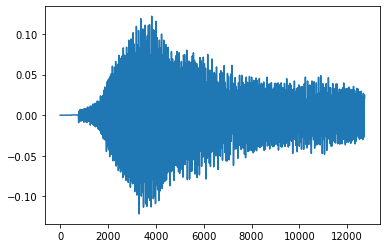

In [274]:
import sounddevice as sd
import numpy as np
import time
import matplotlib.pyplot as plt
fs = 48000
duration = 0.3
sd.default.samplerate = fs

lim = 1e-5


def delay(s,n,fadeouttime = 1):
    fadeouttime*=n
    l = len(s)
    m = np.max(s)
    lm = l*n
    v = np.empty(lm)
    for i in range(n):
        v[i*l:(i+1)*l] = s
    for i in range(len(v)):
        v[i] /= (1+(i*fadeouttime)/lm)
    return v

def reverse(s):
    return np.flip(s)

def wavedelay(s,n):
    return delay(np.concatenate([s,reverse(s)]),n)

def reversedelay(s,n):
    return delay(reverse(s),n)

def fuzz(sig,a):
    s = sig.copy()
    m = np.max(s)
    f = abs(s)>a
    s[f]=a
    s*=m
    return s
    


########Record############
timebefore = 4

for i in range(timebefore):
    print(f"recording in {timebefore-i} seconds!")
    time.sleep(1)

print("Recording!")
rec = sd.rec(int(duration * fs),channels=2)
sd.wait()
rec = np.max(rec,axis=1)
clean = rec[abs(rec)>lim]



plt.plot(clean)
plt.show()


Done!


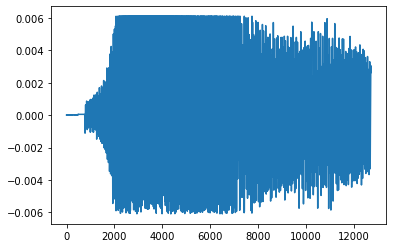

In [277]:

######## Do effects ######

def fuzz(sig,a):
    s = sig.copy()
    m = np.max(s)
    f = abs(s)>a
    s[f]=a
    s*=m
    return s
    


# re = wavedelay(clean,3)
re = fuzz(clean,0.05)
print("Done!")
plt.plot(re)
plt.show()

In [285]:
######## Play ######


sd.wait()
print("Playing!")
sd.play(rec)

Playing!
